# Hypothesis Testing

- Academic and industry professionals have questions about anythign

    - we first generate a question as a hypothesis
    
    - we then need to collect data to see which hypothesis is likely to be true
    
- E.g. We want to see most popular ice cream flavor

    - $ H_0 $ is choclate as most flavored
        
        - we see if data supports this
        
- To know our conclusion is valid/ reliable

    - we can use hypothesis testing and confidence intervals to allow us to use only sample data to draw conclusions about an entire population
    
- E.g is a drug effective (it is more tough to set up a hypothesis test here)

    - how do we quantify this, do they feel better? do they live longer? Reduce tumor size?
    
- we will learn about how to set up and evaluate the results of hypothesis test

## Settting UP Hyptothesis

- First:

    - translate our question into two hypothesis
    
        - NULL: $H_0$
        
            - null hypothesis is true before we collect data
            
            - has two groups equal or the effect being zero
            
            - typically holds $=, >=, <= $
        
        - Alternative: $ H_1$
        
            - what we would like or try to prove is true
            
            - typically holds $ !=, <, > $
        
    - $ H_0 $ and $H_1$ should be competing and non overlapping hypotheses
    
- E.g. innocent until proven guilty

    - we believe everyone to be innocent initially
    
        - null hypothesis, we believe it before collecting any data
    
    - competing hypothesis is guilty
    
    - we then collect data to see which hypothesis is supported
    
- E.g. Imagine we create a new web page layout and we want to see if it gives us more traffic

    - $ \mu_{new} > \mu_{old} $
    
    - we hope the new page is better, but we need to prove it
    
        - the fact that we have to prove new page is better is the alternative hypothesis
        
    - $ H_0: \mu{new} <= \mu{old}$ 
    
    - $ H_1: \mu{new} > \mu{old}$
    
    - Notice that they are both collectively exhastive

So in general, if we see a equal sign somewhere in it its a null hyptothesis and if we don't its an alternative hypothesis

Note that we can also create a hypothesis with non defined metrics

"Dyson air purifiers are the best." -> NULL: dyson purifiers are not the best. ALT: dyson purifiers are the best

- We could test this by defining the metric of what quantifies them as the best, lets say total reviews. We then get a sample of reviews and we see if they get the highest ratings vs all their competitors. 

## Types of errors

- Why does all this null and alt matter:

    - consider the judicial combinations
    
    - Below is a truth by decision matrix
    
        - truth is what really happened decision is what was decided by jury
        
        - a and d are proper verdicts, so there is no error in our hypothesis test
        
        - c is that they are innocent and they were convicted as guilty. This is a Type I error and it is the worst kind of error we can make in US Judicial System 
        
            - it is assocaited with the null hypothesis being true and the alternative is chosen
            
                - it is known as false positive
                
                - if $H_0$ is true, choose $H_1$
                
                - denoted by $\alpha$
                
        - Type II error is that we believe the null hypothesis to be true but the alternative was true (cell b)
        
            - false negative
            
            - if $H_1$ is true, choose $H_0$
            
            - denoted by $\beta$
    

**truth by decision matrix**

\begin{matrix}
truth/decision & guilty & innocent \\
guilty & a & b\\
innocent & c & d
\end{matrix}



**truth by decision matrix**

\begin{matrix}
truth/decision & guilty & innocent \\
guilty & ok & -\\
innocent & + & ok
\end{matrix}



- At the two extremes

    - a jury could convict nobody and have lots of type II errors. A lot of $H_1$ being true, but $H_O$
    
        - we never want to commit a Type I error, so we commit lots of Type II errors
    
    - a jury could convict everyone and have lots of type I errors. A lot of $H_0$ being true, but $H_1$ anyway
    
        - we never want to commit a Type II error, so we commit lots of Type I errors
    
- Correctly setting up the null and alternative hypothesis test in the correct way is important because they define the importance of errors that we are making 

- Professionals frequenctly set a thershold of how many Type I errors they are willing to commit

    - they first set up their null hypothesis that the Type I error is the worse of the two errors

    - then they try to keep the Type II errors as low as possible while still meeting this threshold
    
- Typically:

    - $\alpha = 0.01$ in medical journals
    
    - $\alpha = 0.05 $ in business and research
    
- But we need to think about what is good $\alpha$ for our application

Note: in a business context if we have a Type II error we would miss a good business opportunity that could generate more money. But if we commit a Type I error we would invest money in a project that loses money and wastes resources

Note: Power of a statistical test is $1-\beta$, this is the ability to correctly choose the alternative hypothesis. But we can look at these errors in many ways, so it isn't important to know all the ways now, just to apply these ideas to real problems and real hypothesis

## Common Types Of Hypothesis Tests

1. Testing a population mean (One sample t-test).

    - E.g Can we expect a return of above 6% on an investment
    
        - $H_0: \mu <= 6$

        - $H_1: \mu > 6$
    
2. Testing the difference in means (Two sample t-test)

    - $H_0: \mu - 6 <= 0$

    - $H_1: \mu - 6 > 0$

3. Testing the difference before and after some treatment on the same individual (Paired t-test)

4. Testing a population proportion (One sample z-test) 
    
    - $H_0: \pi_{new} = \pi_{old}$

    - $H_1: \pi_{new} \neq \pi_{old}$

5. Testing the difference between population proportions (Two sample z-test)

    - E.g. Which of two marketing campaigns will drive more traffic to our website 
    
        - $H_0: \pi_{new} - \pi_{old} <= 0$
        
        - $H_1: \pi_{new} - \pi_{old} >0$



- But instead of memorizing all the different kinds of tests we can perform, it is better to:

    - find a statistic(s) that best estimate the parameter(s) I want to estimate
    
    - bootstrap to simulate the sampling distribution
    
    - Use the sampling distribution to assist in choosing the appropriate hypothesis

## How do we choose between hypothesis

- Once we finish setting up, we need to use data to choose which hypothesis is actually true

    - we can use CI approach, where we simulate the distribution of our sample statistic and we can see if our hypothesis is consistent what we see in our sampling distribution
    
    - Simulating what we believe to be possible under the NULL and then seeing if our data is consistent with that
    
        - this is what professionals tend to do in hypothesis testing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

np.random.seed(42)

df = pd.read_csv("data/coffee_dataset.csv")

In [3]:
df.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


Question: Average height of all population is greater then 70 inches:

$$ H_0: \mu <= 70 $$

$$ H_1: \mu > 70 $$

Approach 1: Based on the approach with confidence intervals is to bootstrap sample data and compute the sample mean distribution and the corresponding CI to determine what are the reasonable values for the population mean at some level of confidence

In [4]:
sample = df.sample(150)

In [5]:
bootsample = sample.sample(150, replace=True)

In [6]:
boot_mean = []
for _ in range(10000):
    bootsample = sample.sample(150, replace=True)
    boot_mean.append(bootsample.height.mean())

In [7]:
low, high = np.percentile(boot_mean, 2.5), np.percentile(boot_mean, 97.5)

In [8]:
low, high

(67.10258508046543, 68.15617490636114)

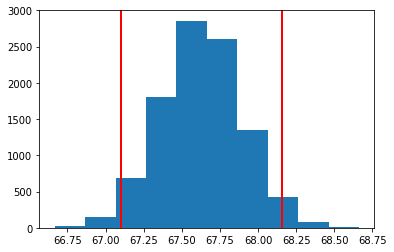

In [9]:
plt.hist(boot_mean)
plt.axvline(x=low, color='r', linewidth=2);
plt.axvline(x=high, color='r', linewidth=2);

Conclusion: we can see that with our current sample that the null hypothesis is more likely to be true and that even at 100% confidence the sample mean isn't at 70. SO we can be fairly certain we can reject the alternative hypothesis

## Approach 2: Simulating From Null Hyptothesis

- Rather then setting up a null and alternative hypothesis

$$ H_0: \mu <= 70 $$

$$ H_1: \mu > 70 $$

- We assume that the NULL is true, and we would know what the sampling distribution would look like from the closest value under the null before the alternative

    - so this value of 70
    
- We then can use the standard deviation of the sampling distribution to determine what the sampling distributon would look like if it came from the NULL hypothesis 


We can simulate from the null hypothesis

In [10]:
np.random.seed(42)
df = pd.read_csv("data/coffee_dataset.csv")

In [11]:
sample_df = df.sample(150)

In [12]:
means = []
for _ in range(10000):
    bootsample = sample_df.sample(150, replace=True)
    means.append(bootsample.height.mean())

In [13]:
np.std(means)

0.26580395144180324


- We know the standard deviation of our sampling distribution is 0.2658, and we know that if it came from the NULL Hypothesis value of 70 how it would look

- With a sample size of 150 we would know that it would follow a normal distribution by the CLT

- We can then simulate draws from the normal distribution using the hypthosized mean of 70 and our sample standard deviation

In [14]:
null_vals = np.random.normal(70, np.std(means), 10000)

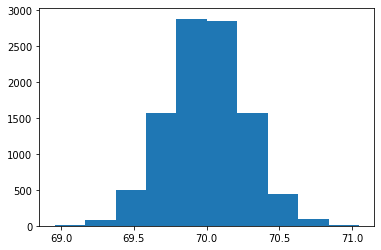

In [15]:
plt.hist(null_vals);

Now we can ask the question: where does the sample mean fall in this distribution

In [16]:
sample_df.height.mean()

67.63297688228059

We can see that it falls far away from the center of the null hypothesis. But we see our sample mean is so far from our normal distribution that it didn't likely come from the normal null hypothesis distribution

So we accept our null hypothesis and reject our alternative hypothesis

In [17]:
np.random.seed(42)

full_data = pd.read_csv('data/coffee_dataset.csv')
sample_data = full_data.sample(200)

1. If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be?

$$ H_0: \mu_{c} = \mu_{\neg c}$$

$$ H_1: \mu_{c} \neq \mu_{\neg c}$$

where c is the property that they do drink coffee, and the parameter is the population height of the groups

2. If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative hypotheses be?

$$ H_0: \mu_{c} >= \mu_{\neg c}$$

$$ H_1: \mu_{c} < \mu_{\neg c}$$

where c is the property that they do drink coffee, and the parameter is the population height of the groups

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.

In [18]:
c_arr, n_c_arr, means = [], [], []
for _ in range(10000):
    bootstrap = sample_data.sample(200, replace=True)
    avg_c = bootstrap[bootstrap["drinks_coffee"] == True].height.mean()
    avg_n_c = bootstrap[bootstrap["drinks_coffee"] == False].height.mean()
    diff = avg_c - avg_n_c
    c_arr.append(avg_c)
    n_c_arr.append(avg_n_c)
    means.append(diff)

The standard deviation of the sampling distribution for the mean of those that do not drink coffee.

In [19]:
np.std(n_c_arr)

0.4051263127747525

The standard deviation of the sampling distribution for the mean of those that drink coffee.

In [20]:
np.std(c_arr)

0.24073763373472962

The standard deviation of the sampling distribution for the difference in means of those that drink coffee and those that do not.

In [21]:
np.std(means)

0.4698091074387144

In [22]:
import math
# Notice:
math.sqrt(np.var(c_arr) + np.var(n_c_arr))

0.4712557029879462

This is because:
$S_{1 - 2} = \sqrt{S_1^2 + S_2^2} $

But what this really means is that the difference in means standard deviation has a relationship with each other member in that it is larger then both

What is the shape of each sampling distribution and why?

Normal by the CLT

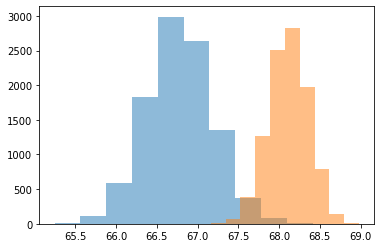

In [23]:
plt.hist(n_c_arr, alpha=0.5);
plt.hist(c_arr, alpha=0.5);

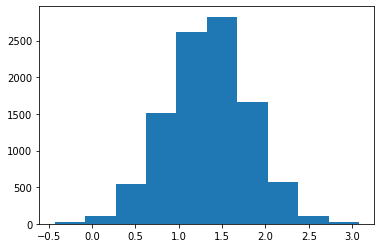

In [24]:
plt.hist(means);

4. Now, use your observed sampling distribution for the difference in means and the docs to simulate what you would expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in sample_data.

Hypothesis limit: $\mu_1 - \mu_2 = 0$, so this is where we simulate

In [25]:
null_mean = 0
null_values = np.random.normal(loc=null_mean,  scale=np.std(means), size=10000)

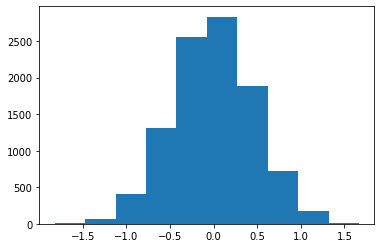

In [26]:
plt.hist(null_values);

In [27]:
np.array(means).mean()

1.3362713474811618

Conclusion: we can see that it is at the very right side of our distribution, so it is unlikely that the heights are equal. Therefore we should reject the nulll hypothesis and state that it is likely there is a difference in coffee drinkers heights.

Note: we would expect the standard deviation from the null to be the same as what we observed from the data, this is reasonable because they are both the sampling distribution from the difference in means

## P values

- 1st explanation:

    - Def: if $H_0$ is true, the probability of obtaining the observed statistic or one or more extreme in favor of the alternative hypothesis

- 2nd explaination:

    - First we make the assumption that our null hypothesis is true and then we use the sample standard deviation to create a normal distribution

        - we then use the conditional probability of `P(our_data | null hypothesis is true)`

    - Second we need to find out what we need to compute

        - we shade in the direction of our alternative hypothesis

    
- 3rd explanation:
    
    - The definition of a p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

    - The more extreme in favor of the alternative portion of this statement determines the shading associated with your p-value.

Recall: a low p value indicates strong evidence against the null hypothesis, so we can reject the null hypothesis

![](norm_dist_1.png)

![](norm_dist_2.png)

![](norm_dist_3.png)

## Calcuating the P Value

1. Simulate the value of your statistic that are possible from the null

2. Calculate the value of the statistic we actually obtained from the data

3. Compare your statistic to the values from the null

4. calculate the poportion of values that are considered extreme based on your alternative

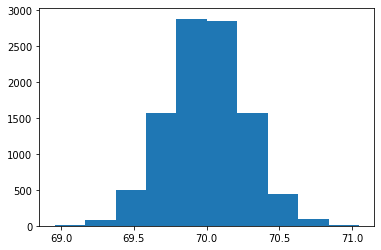

In [28]:
plt.hist(null_vals);

In [29]:
sample_mean = sample_df.height.mean()

In [30]:
sample_mean

67.63297688228059

We saw prev how we could simulate draws from the null hypothesis, and that if our statistic was in the bulk of the distribution then it suggests that the statistic was from that null

But if our statistic was out of the bulk of the distribution, then the null was proabably not what generated the statisitc.

Then we saw that we can calculate p values from shaded region starting from the observed statistic through the tail of the distribution where the shaded region is dependend on our alternative

Say we have:

$$H_0: \mu <= 70 $$
$$H_1: \mu > 70 $$

Caculate the p value of the porportion of the draws that are larger then our sample mean

In [31]:
(null_vals > sample_mean).mean()

1.0

Conclusion: we can see that when we generated a normal distribution with the same standard devation as our sample with our null hypothis of 70 and highlighted the top of our distribution, we see that 100% of our values are bigger then the sample mean, so we cannot reject our null hypothesis

In below chart, we can see that we would highlight 100% of the histogram because our sample was smaller then 100% of our values

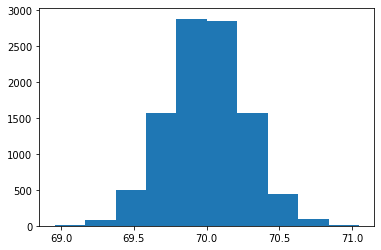

In [32]:
plt.hist(null_vals);

Say instead we had this as our hypothesis


$$H_0: \mu >= 70 $$
$$H_1: \mu < 70 $$

In [33]:
(null_vals < sample_mean).mean()

0.0

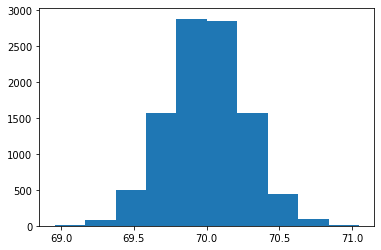

In [34]:
plt.hist(null_vals);

Here we would highlight from our sample mean 67 left on the histogram, which is 0%. So our hypothesis that the population mean is less then 70 is most likely true and we would reject the null hypothesis

$$H_0: \mu = 70 $$
$$H_1: \mu \neq 70 $$

In [35]:
null_mean = 70
(
 (null_vals < sample_mean).mean() + 
 (null_vals > null_mean + (null_mean - sample_mean)).mean() 
)

0.0

72.36702311771941


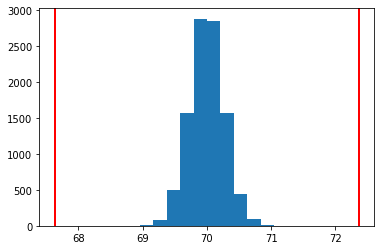

In [36]:
low = sample_mean
high = null_mean + (null_mean-sample_mean)
print(high)
plt.hist(null_vals)
plt.axvline(x=low, color='r', linewidth=2)
plt.axvline(x=high, color='r', linewidth=2);

Here we can go to the left and right side of each value and be confident that the null hypothesis distribution did not generate our sample statistic

## Connecting Errors and P Values

- If we have a small p value we would be more likely to make a decision to reject the null hypothesis

- How small does the P value have to be?

    - P value <= $\alpha$, which is how much type 1 error we are willing to have.
    
    - 0.05 errors where we choose alternative correctly
    
- So if the p value is less then the type I error rate, we reject the null hypothesis, else we fail to reject NULL

## Conclusions in hypothesis testing

- cringeworthy conclusions

    - we accept the null hypothesis to be true
    
    - we accept the alternative hypothesis to be true
    
    
- It is cringeworthy to act like we are choosing between hypothesis, instead we accept the null hypothesis until it is rejected

    - so we would say, we failed to reject the null hypothesis or we have evidence to reject the null hypothesis
    
- We do this because we want the null to be seen as being much more likely to be chosen

## Calculating Errors

In [37]:
jud_data = pd.read_csv('data/judicial_dataset_predictions.csv')
par_data = pd.read_csv('data/parachute_dataset.csv')

1. Above, you can see the actual and predicted columns for each of the datasets. Using the jud_data, find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type. Use the results to answer the questions in quiz 1 below.

In [38]:
jud_data.head()

,defendant_id,actual,predicted
0,22574,innocent,innocent
1,35637,innocent,innocent
2,39919,innocent,innocent
3,29610,guilty,guilty
4,38273,innocent,innocent


In [39]:
# Errors
errors_df = jud_data[jud_data["actual"] != jud_data["predicted"]]

In [40]:
total_error_rate = errors_df.shape[0] / jud_data.shape[0]

In [41]:
type_1 = jud_data.query("actual == 'innocent' and predicted=='guilty'").shape[0] / jud_data.shape[0]
type_1

0.001510366607167376

In [42]:
type_2 = jud_data.query("actual == 'guilty' and predicted=='innocent'").shape[0] / jud_data.shape[0]
type_2

0.04064259233832212

In [43]:
# If everyone was predicted to be guilty
jud_data.query("actual=='innocent'").shape[0] / jud_data.shape[0] 

0.45159961554304545

## Impact of sampling and large sample size

- Factors to consider when hypothesis testing

    - is my sample representitive of the population
    
        - if your sample isn't representative, your conclusions are likely to be incorrect
        
    - impact of our sample size
    
        - with large sample sizes, everything is statistically significant
        
        - say we have 1 million people poll they like beverage 1 better then beverage 2, but you find out it is only more popular by 0.0002% it is not practically important
        
- If we have very large sample size, hypothesis tests may not be useful

    - with ML we can individualize an approach

## What if we test more then once

- if we run 20 identical hypothesis tests, we can expect 1 type 1 error

- if one researcher comes up with significant results, we can't know if its a type 1 error

- Bonferoni correction

    - if we perform m tests, we should divide $\alpha$ by m to maintain error rate

## CI VS Hypothesis Tests

- Using a two sided $\neq$ is the same in terms of conclusion of confidence interval as long as:

    - $1- CI = \alpha$
    
- So if we build a 95% CI, it is the same as a hypothesis test two sided with 0.05 Type I error rate

    - 1 - 0.95 = 0.05
    
- CI, effects sizing, and ML tequnicuqes are being used as hypothesis testing is often misinterpreted

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('data/coffee_dataset.csv')

`1.` In this case imagine, we are interested in testing if the mean height of all individuals in the `full_data` is equal to 67.60 inches.  First, use **quiz 1** below to identify the null and alternative hypotheses for these cases. 

$$H_0: \mu = 67.60 $$
$$ H_1: \mu \neq 67.60 $$

2. Find:


- What is the population mean height?

- What is the standard deviation of the population heights? Create a sample set of data using the code below.

- What is the sample mean height? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.
- What is the standard deviation of the sampling distribution of the mean of five draws? Use quiz 2 below to assure your answers are correct.

In [48]:
full_data.height.mean()

67.59748697307934

In [49]:
full_data.std()

user_id          1833.646002
drinks_coffee       0.491957
height              3.119433
dtype: float64

In [50]:
sample1 = full_data.sample(5)

In [52]:
sample1.height.mean()

67.88234252049084